Importación de Librerías 

In [62]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Definición de la fecha de inicio y de cierre

In [74]:
start_date = '2000-01-01'
end_date = datetime.datetime.now()
int = '5d'

Instancia de un ticker para obtener un dataframe con los datos históricos

In [75]:
sp500_ticker = yf.Ticker("^GSPC")
historical_prices = sp500_ticker.history(start = start_date , end = end_date, interval = int)
historical_prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0
2000-01-11 00:00:00-05:00,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,0.0,0.0
2000-01-21 00:00:00-05:00,1445.569946,1453.180054,1439.599976,1441.359985,1209800000,0.0,0.0
2000-01-26 00:00:00-05:00,1410.030029,1412.729980,1400.160034,1404.089966,1117300000,0.0,0.0
2000-01-31 00:00:00-05:00,1360.160034,1394.479980,1350.140015,1394.459961,993800000,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-25 00:00:00-05:00,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,0.0,0.0
2023-01-30 00:00:00-05:00,4049.270020,4063.850098,4015.550049,4017.770020,3802000000,0.0,0.0
2023-02-09 00:00:00-05:00,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0


Resetear Índice y la columna 'Date' pasa a ser columna lista para usar

In [70]:
historical_prices = historical_prices.reset_index()


Cambiar la columna 'Date' a formato datetime solo fecha

In [34]:
historical_prices['Date'] = historical_prices['Date'].dt.date

Las columnas con valor numerico flotante solo dejaremos dos decimales

In [38]:
historical_prices[['Open','High','Low','Close']] = historical_prices[['Open','High','Low','Close']].round(2)

Visualización tabla modificada

In [39]:
historical_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03,1469.25,1478.00,1438.36,1455.22,931800000,0.0,0.0
1,2000-01-04,1455.22,1455.22,1397.43,1399.42,1009000000,0.0,0.0
2,2000-01-05,1399.42,1413.27,1377.68,1402.11,1085500000,0.0,0.0
3,2000-01-06,1402.11,1411.90,1392.10,1403.45,1092300000,0.0,0.0
4,2000-01-07,1403.45,1441.47,1400.73,1441.47,1225200000,0.0,0.0
...,...,...,...,...,...,...,...,...
5820,2023-02-21,4052.35,4052.35,3995.19,3997.34,4121590000,0.0,0.0
5821,2023-02-22,4001.83,4017.37,3976.90,3991.05,4079320000,0.0,0.0
5822,2023-02-23,4018.60,4028.30,3969.19,4012.32,3952940000,0.0,0.0
5823,2023-02-24,3973.24,3978.25,3943.08,3970.04,3877700000,0.0,0.0


Gráfico rápido para la visualización a grandes rasgos, se nota tendencia alcista

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


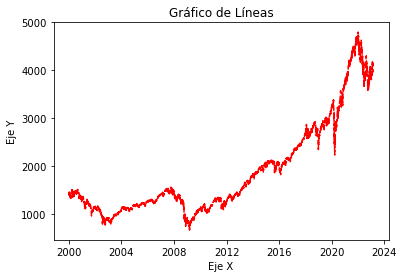

In [41]:
x = historical_prices['Date']
y = historical_prices['Close']


plt.plot(x, y, color='red', linestyle='dashed')
plt.title('Gráfico de Líneas')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

Encontrar Valor del precio actual 

In [43]:
actual_price = historical_prices['Close'].iloc[-1]
actual_price

3982.24

Obtener máximo historico 

In [47]:
max_historical = historical_prices['High'].max()
max_historical

4818.62

Al leer la página de wikipedia nos sirve como referencia para saber que simbolo es cada empresa y obtener una lista

In [63]:
tickers_sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [65]:
tickers_sp500['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

Definimos la lista

In [78]:
Empresas = tickers_sp500['Symbol'].to_list()


Rendimiento del fondo SP-500

In [88]:
Rendimiento_sp500 = historical_prices['Close'].pct_change()
Rendimiento_sp500.mean()

0.0012154779418162

Volatilidad del fondo SP-500

In [89]:
Volatilidad_sp500 = Rendimiento_sp500.std()
Volatilidad_sp500

0.025174067012600086

Sharpe Ratio del fondo SP-500

In [90]:
risk_free_rate = 0.02 #tasa libre de riesgo del 2%
sharpe_ratio_sp500 = (Rendimiento_sp500.mean() - risk_free_rate) / Volatilidad_sp500
sharpe_ratio_sp500

-0.7461854315705841